In [25]:
# Importation des bibliothèques nécessaires
from sklearn.model_selection import train_test_split  # Pour diviser les données en ensembles d'entraînement et de test
from sklearn.preprocessing import StandardScaler      # Pour normaliser les données
from sklearn.linear_model import LinearRegression     # Pour la régression linéaire
from sklearn.metrics import mean_squared_error        # Pour calculer l'erreur quadratique moyenne (MSE)
import matplotlib.pyplot as plt                       # Pour afficher les graphiques
import numpy as np                                    # Pour les opérations sur les tableaux et matrices
import pandas as pd

In [26]:
# Sélection des caractéristiques pertinentes (colonnes) du DataFrame 'data' et conversion en tableau NumPy
data = pd.read_csv('../Housing.csv')
Xdata = data[['price','area', 'bedrooms', 'bathrooms', 'stories']].to_numpy()

In [27]:
# Normalisation des données (centrage et réduction)
Xscaled = StandardScaler().fit_transform(Xdata)

In [28]:
# On sépare les données :
# yscaled contient les valeurs cibles (prix des maisons, qui est la première colonne des données normalisées)
# Xf contient les caractéristiques explicatives (surface, nombre de chambres, etc., qui sont les colonnes restantes)
yscaled = Xscaled[:, 0]  # Le prix (la première colonne)
Xf = Xscaled[:, 1:]      # Les autres caractéristiques (surface, chambres, salles de bains, étages)

In [29]:
# Nombre d'itérations pour l'échantillonnage aléatoire
numXp = 100

In [30]:
# Initialisation d'un tableau pour stocker les erreurs MSE pour différents nombres de caractéristiques
MSE = np.zeros((4, numXp))

In [31]:
# Boucle sur le nombre de caractéristiques k (de 1 à 4)
for k in range(4):
    # Boucle pour effectuer plusieurs essais avec un échantillonnage aléatoire
    for i in range(numXp):

        # Division des données en ensembles d'entraînement et de test avec un seul point dans le test (test_size=1)
        Xftrain, Xftest, ytrain, ytest = train_test_split(Xf, yscaled, test_size=1)

        # Entraînement du modèle de régression linéaire en utilisant k+1 caractéristiques
        reg = LinearRegression().fit(Xftrain[:, :k+1], ytrain)

        # Prédiction sur l'échantillon de test
        prediction = reg.predict(Xftest[:, :k+1])

        # Calcul de l'erreur quadratique moyenne entre la prédiction et la valeur réelle
        MSE[k, i] = mean_squared_error(prediction, ytest)

In [32]:
# Calcul de la moyenne des erreurs MSE pour chaque k
averageMSE = np.mean(MSE, axis=1)

# Affichage de la moyenne des MSE pour les différents modèles
print(averageMSE)

[0.55963942 0.66323667 0.43520388 0.39737311]


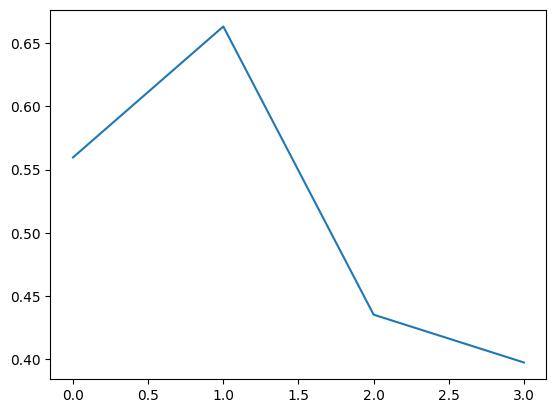

In [33]:
# Visualisation de l'évolution de l'erreur quadratique moyenne en fonction du nombre de caractéristiques
plt.plot(averageMSE)
plt.show()